In [1]:
import numpy as np
import scipy as sp
from scipy.io import wavfile
from matplotlib import pyplot as plt
import IPython.display as ipd

# Pasando música en Python

In [2]:
ipd.Audio("tone.wav")

In [3]:
rate, data = wavfile.read("tone.wav")
print(f"rate: {rate} Hz")
print(f"data: {data}")

rate: 44100 Hz
data: [   -1  1644  3277 ... -4903 -3277 -1642]


In [4]:
print(f"shape: {data.shape}")
print(f"dtype: {data.dtype}")

shape: (1323000,)
dtype: int16


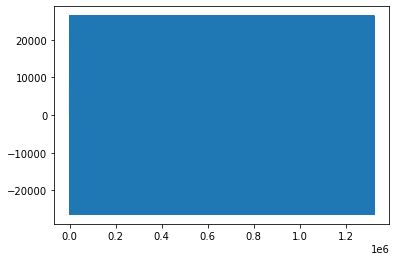

In [5]:
plt.plot(data)

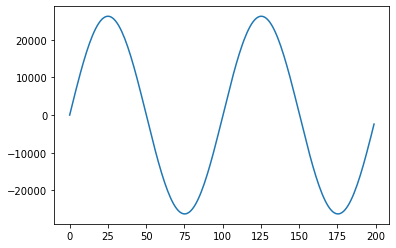

In [6]:
plt.plot(data[:200])

In [7]:
length = data.shape[0] / rate
print(f"Duración: {length} s")

Duración: 30.0 s


In [8]:
time = np.linspace(0, length, data.shape[0], endpoint=False)

Text(0.5, 0, 'tiempo [segundos]')

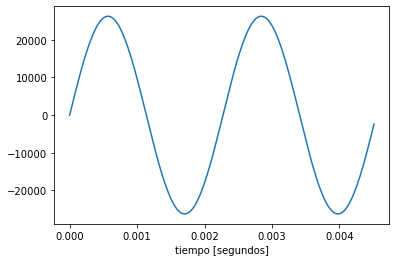

In [9]:
plt.plot(time[:200], data[:200])
plt.xlabel('tiempo [segundos]')

In [10]:
tdata = np.fft.fft(data)
print(f"shape: {tdata.shape}")
print(f"dtype: {tdata.dtype}")
print(f"tdata: {tdata}")

shape: (1323000,)
dtype: complex128
tdata: [-61.         +0.j          69.55892715-71.28093703j
  71.9353777 -69.21126569j ...  65.69475575-21.54178349j
  71.9353777 +69.21126569j  69.55892715+71.28093703j]


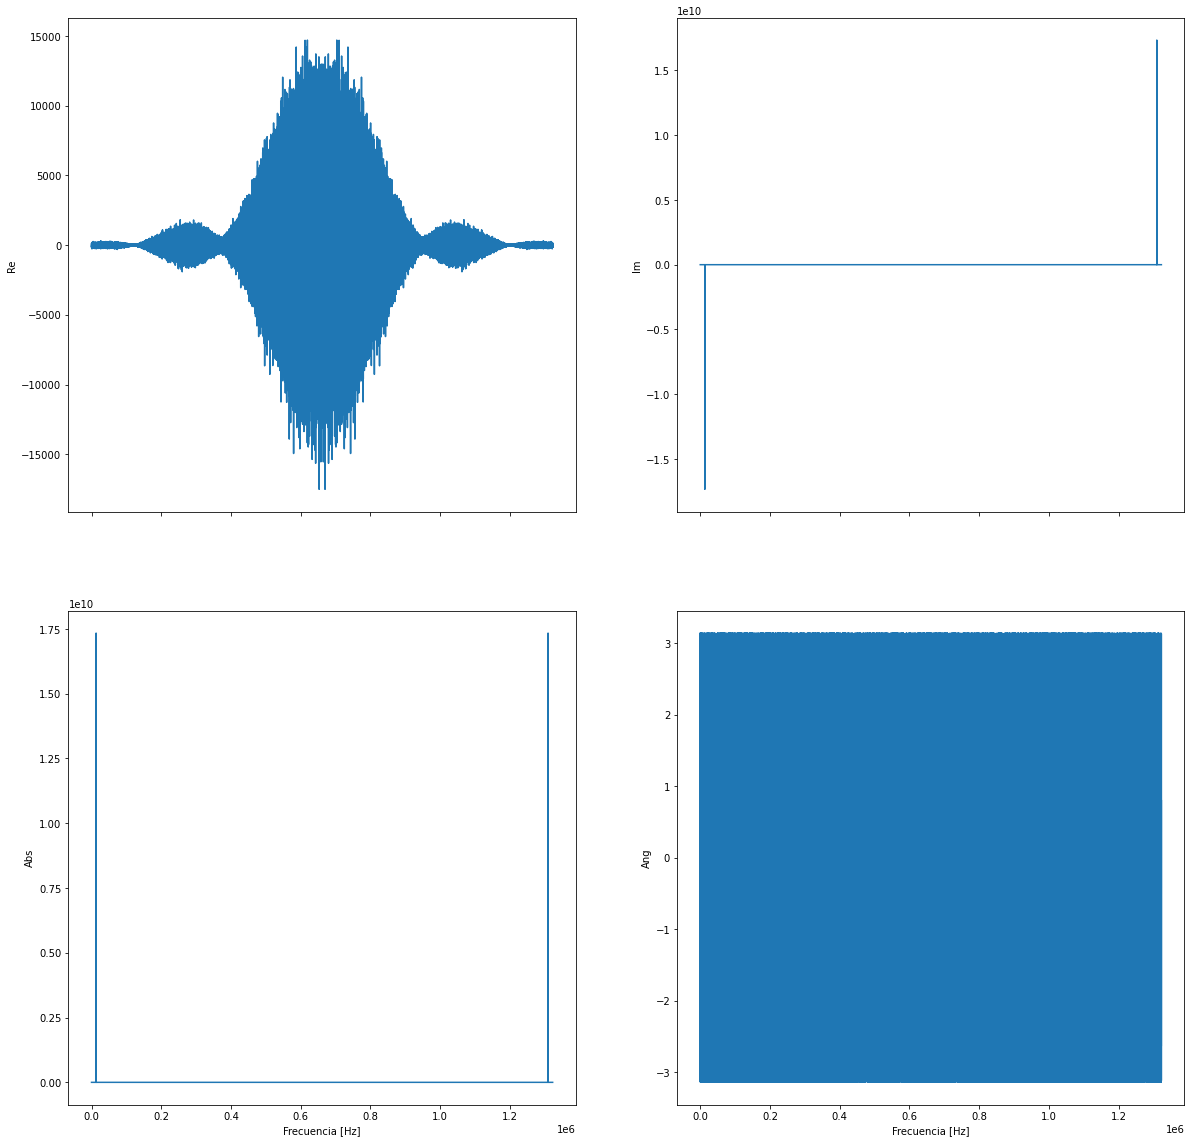

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20), sharex=True)
axs[0][0].plot(tdata.real)
axs[0][0].set_ylabel('Re')

axs[0][1].plot(tdata.imag)
axs[0][1].set_ylabel('Im')

axs[1][0].plot(np.abs(tdata))
axs[1][0].set_ylabel('Abs')
axs[1][0].set_xlabel('Frecuencia [Hz]')

axs[1][1].plot(np.angle(tdata))
axs[1][1].set_ylabel('Ang');
axs[1][1].set_xlabel('Frecuencia [Hz]');

In [12]:
freqs = np.fft.fftfreq(len(time)) * rate

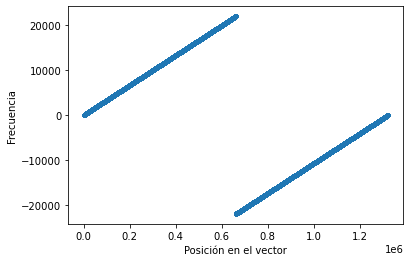

In [14]:
plt.plot(np.arange(len(freqs)), freqs, '.')
plt.xlabel("Posición en el vector")
plt.ylabel("Frecuencia");

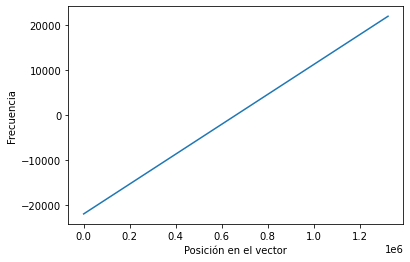

In [15]:
freqs = np.fft.fftshift(freqs)
tdata = np.fft.fftshift(tdata)
plt.plot(np.arange(len(freqs)), freqs)
plt.xlabel("Posición en el vector")
plt.ylabel("Frecuencia");

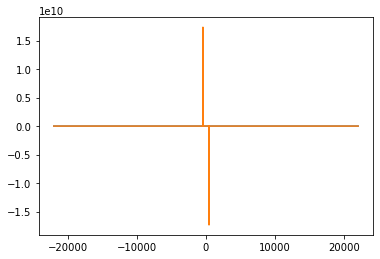

In [16]:
plt.plot(freqs, tdata.real, freqs, tdata.imag);

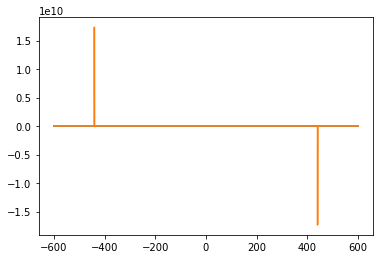

In [17]:
sel = np.abs(freqs) < 600
plt.plot(freqs[sel], tdata.real[sel], freqs[sel], tdata.imag[sel]);

In [20]:
ipd.Audio(data)

ValueError: rate must be specified when data is a numpy array or list of audio samples.

In [22]:
ipd.Audio(data, rate=2*rate)

Para hacer
----------

1. Encontrar la frecuencia del tono de forma automática a partir de la transformada de fourier.
2. El archivo *stereo.wav* contiene dos canales de audio. ¿Qué cambia en el formato de los datos?.
3. Realizar el mismo análisis de Fourier para cada uno de los canales.
4. Utilizando Python, generar una señal sinusoidal de 600 Hz y grabarla a un archivo WAV